<a href="https://colab.research.google.com/github/KKseniaK/myPortfolio/blob/main/Handwritten_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Including important Python libraries and tools for image processing, like OpenCV for image manipulation, NumPy for numerical operations, Matplotlib for visualization, and TensorFlow for machine learning tasks

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Loading the MNIST dataset using TensorFlow's Keras API, which contains a collection of handwritten digit images and their corresponding labels

In [ ]:
mnist = tf.keras.datasets.mnist

Extracting the MNIST dataset into two sets: one for training data and the other for testing data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Normalizing the pixel values of the training and testing image data along the horizontal axis (axis=1)

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

Building a neural network using pre-built components

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

The model is being compiled with the Adam optimizer, using sparse categorical cross-entropy as the loss function, and accuracy as the evaluation metric for training

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training model for 10 epochs

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2662 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1113 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0757 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0565 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0426 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0340 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0272 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0214 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0174 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss:

The model is being evaluated using the testing data

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1072 - accuracy: 0.9760


[0.10717744380235672, 0.9760000109672546]

Testing our model using our drawn numbers

1/1 [==============================] - 0s 96ms/step
This img is probably a 9


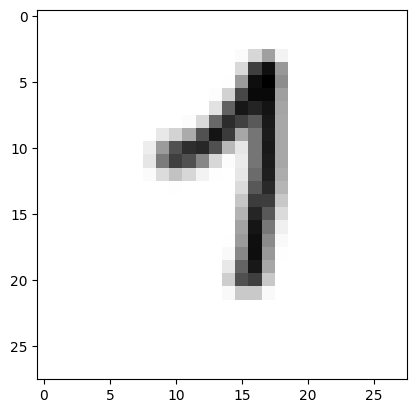

1/1 [==============================] - 0s 23ms/step
This img is probably a 4


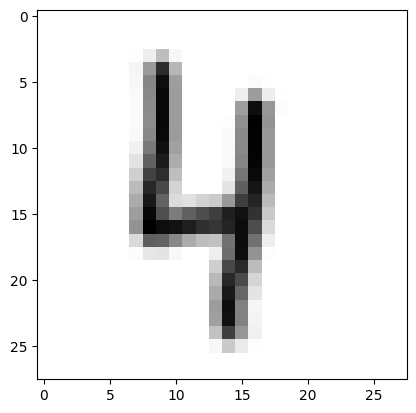

1/1 [==============================] - 0s 27ms/step
This img is probably a 8


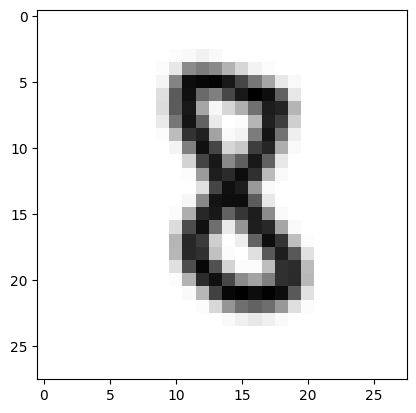

1/1 [==============================] - 0s 20ms/step
This img is probably a 5


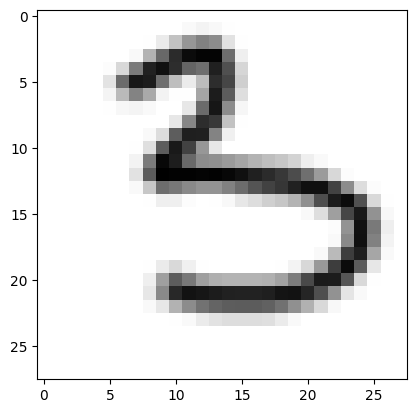

1/1 [==============================] - 0s 21ms/step
This img is probably a 7


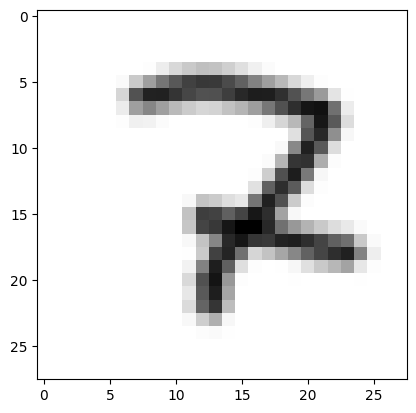

1/1 [==============================] - 0s 32ms/step
This img is probably a 7


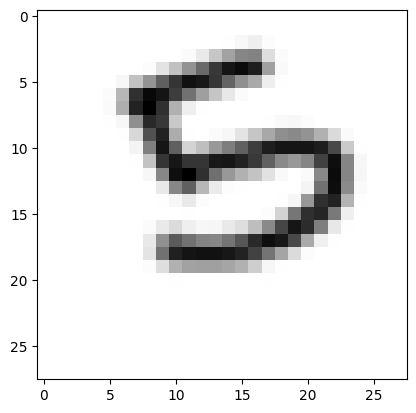

1/1 [==============================] - 0s 35ms/step
This img is probably a 9


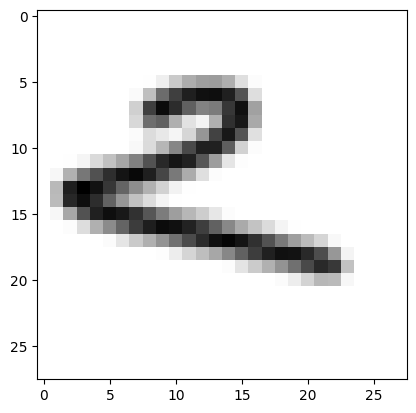

1/1 [==============================] - 0s 41ms/step
This img is probably a 9


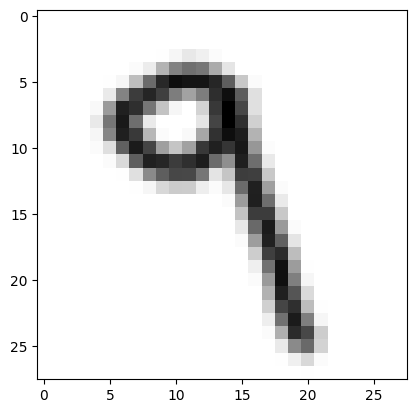

In [ ]:
image_number = 1
while os.path.isfile(f'/content/drive/MyDrive/digits/digt{image_number}.png'):
    img = cv2.imread(f'/content/drive/MyDrive/digits/digt{image_number}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'This img is probably a {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    image_number += 1